# Lecture 1: Data types and dataset issues handling

## Set Up and Mount Google Drive



In [ ]:
# Connect your Google Drive to the Colab environment to access and work with files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check the curent working directory
%pwd


'/content'

In [ ]:
# Change and navigate to the desired directory
%cd drive/MyDrive/NECST/PiA/Lezione1/

/content/drive/MyDrive/NECST/PiA/Lezione1


In [ ]:
# List of the contents of the directory
%ls

images/  Lezione1.ipynb  Lezione1.pptx.pdf  Lezione.pptx


In [ ]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

## NIfTI (Neuroimaging Informatics Technology Initiative)

In [ ]:
# Import library to manipulate NifTi format
import nibabel as nib

In [ ]:
# load the image. it creates a complex object. You can print several info (shape, data type, the header)
mri = nib.load('images/T1.nii.gz')

In [ ]:
# Access the image data and header information
mri_img = mri.get_fdata() # access the image with get_fdata() -> returns an array.
mri_header = mri.header
# Print the dimensions and header information for inspection
print(f"Image dimensions: {mri_img.shape}")
print(f"Header information: {mri_header}")

Image dimensions: (290, 320, 208)
Header information: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 290 320 208   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.          0.8         0.8         0.79999995  2.4         0.
  0.          0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1040.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'FSL4.0')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quat

In [ ]:
# it is a volume so you have to select a slice
mri_slice = mri_img.shape[2] // 2 # for example, we can select the middle slice

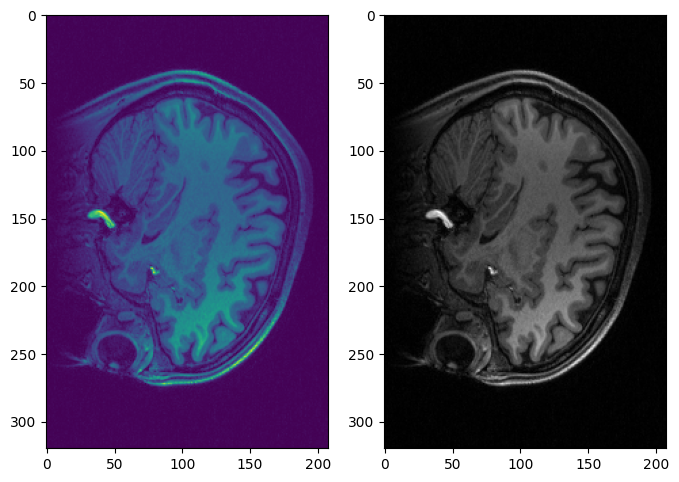

In [ ]:
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
# i am selecting one slice in X, and plotting over y and z
imgplot = plt.imshow(mri_img[mri_slice,:,:]) # standard matplotlib cmap
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_img[mri_slice,:,:], cmap = 'gray') # select gray color map

In [ ]:
from scipy import ndimage

In [ ]:
mri_saggital = ndimage.rotate(mri_img[mri_slice,:,:], 90, reshape=True)

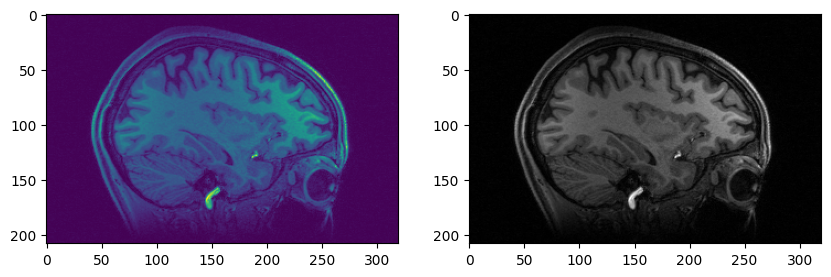

In [ ]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(mri_saggital)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_saggital, cmap = 'gray')

In [ ]:
# you can also leverage the slicing and perform it over y instead of x
# you change your poit of view, because you selected another slice
mri_frontal = ndimage.rotate(mri_img[:,mri_slice,:], 90, reshape=True)

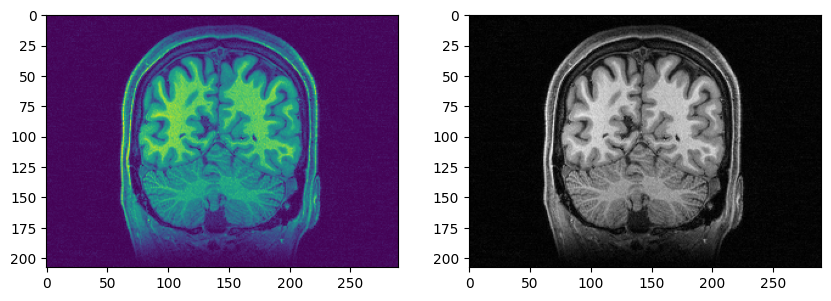

In [ ]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(mri_frontal)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_frontal, cmap = 'gray')

In [ ]:
mri_axial = ndimage.rotate(mri_img[:,:,mri_slice], 90, reshape=True)

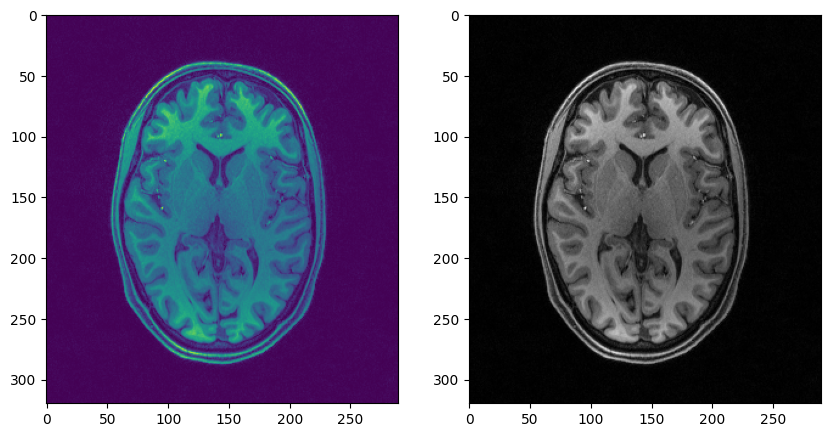

In [ ]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(mri_axial)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_axial, cmap = 'gray')

## DICOM (Digital	Imaging	and	COmmunication	in	Medicine)

In [ ]:
# Install library snce it is not a default package
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.9 MB/s eta 0:00:00


In [ ]:
import pydicom

In [ ]:
# Load DICOM file
ct = pydicom.dcmread('images/CT.dcm')

In [ ]:
# Warning: in nifti, the entire matrix is loaded and contained withing the niigz file, here in dicom
# each file is a single image, you need to build the volume yourself

print('Number of rows '+str(ct.Rows))
print('Number of columns '+str(ct.Columns))
print('Number of bits per pixel '+str(ct.BitsAllocated))
print('Patient ID '+str(ct.PatientID))
print('Pixel Spacing '+str(ct.PixelSpacing))
print('Slice Thickness '+str(ct.SliceThickness))

Number of rows 512
Number of columns 512
Number of bits per pixel 16
Patient ID LIDC-IDRI-0004
Pixel Spacing [0.822266, 0.822266]
Slice Thickness 1.250000


In [ ]:
# Extract the pixel data (image)
ct_img = ct.pixel_array

In [ ]:
print('Type: '+str(type(ct_img)))
print('Data type: ' +str(ct_img.dtype))
print('Dimensions: ' +str(ct_img.shape))

Type: <class 'numpy.ndarray'>
Data type: int16
Dimensions: (512, 512)


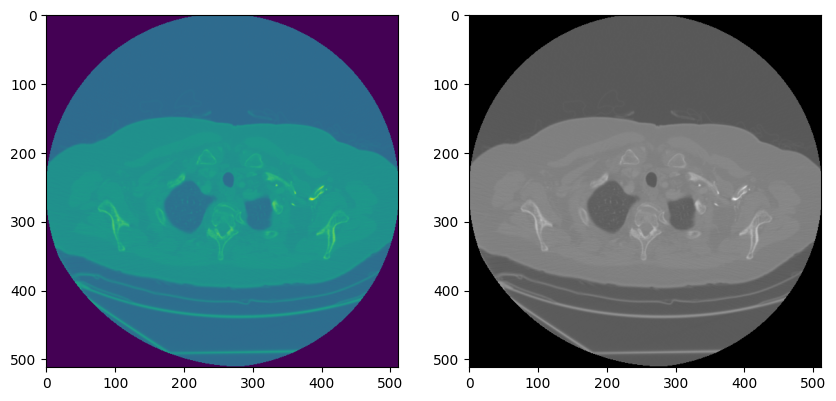

In [ ]:
# Visualize DICOM image
# warning: the gray is background as well as the black at the corners.
# !!! gantry artifact

fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(ct_img)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(ct_img, cmap = 'gray')

## TIFF (Tagged Image File Format)

In [ ]:
# You can visualize and manipualte tiff images wit PIL library
import PIL.Image as tiff

In [ ]:
isto = tiff.open('images/isto.tif')

In [ ]:
isto

In [ ]:
# convert the image into a numpy array for processing
isto_img = np.asarray(isto)

In [ ]:
# Print image dimensions and data type
print(f"TIFF Image dimensions: {isto_img.shape}")
print(f"TIFF Image data type: {isto_img.dtype}")

TIFF Image dimensions: (4794, 6072, 3)
TIFF Image data type: uint8


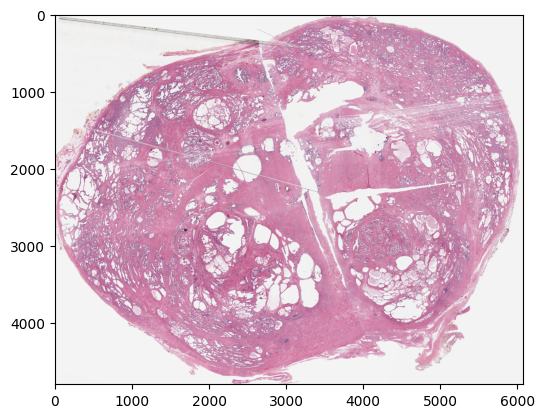

In [ ]:
# Visualize the TIFF image
plt.imshow(isto_img)

Text(0.5, 1.0, 'B')

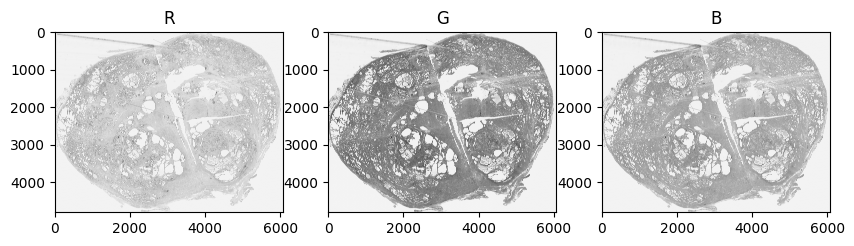

In [ ]:
# channel slicing
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,3,1)
imgplot = plt.imshow(isto_img[:,:,0], cmap = 'gray')
plt.title('R')
a = fig.add_subplot(1,3,2)
imgplot = plt.imshow(isto_img[:,:,1], cmap = 'gray')
plt.title('G')
a = fig.add_subplot(1,3,3)
imgplot = plt.imshow(isto_img[:,:,2], cmap = 'gray')
plt.title('B')

## PNG & JPG

In [ ]:
# OpenCV: standard computer vision library
import cv2

In [ ]:
nat = cv2.imread('images/poli.jpeg')

In [ ]:
# it creates an array
print(f"Image dimensions: {nat.shape}")

(548, 805, 3)


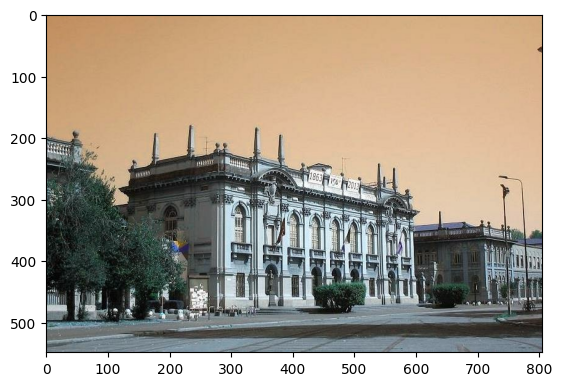

In [ ]:
plt.imshow(nat)

In [ ]:
nat1 = cv2.cvtColor(nat, cv2.COLOR_BGR2RGB) # need to change how interpret the order of channels

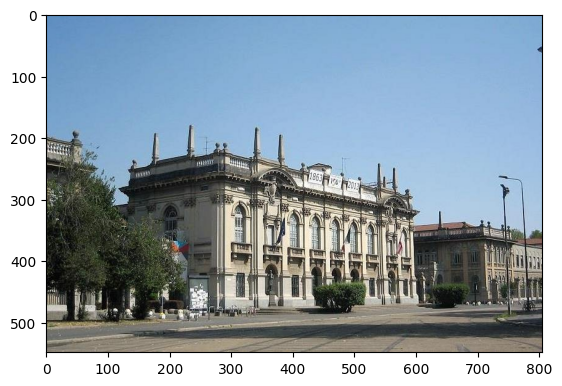

In [ ]:
plt.imshow(nat1)

In [ ]:
cv2.imwrite('images/test.png', ct_img)

True

# Preprocessing for dataset issues

In [ ]:
# Import Useful libraries
import skimage.transform
import os
from scipy.ndimage import zoom
from skimage import exposure
import pydicom as dicom

In [ ]:
pat_path_1 = 'images/1'
pat_path_2 = 'images/2'
dcm_ext = '.dcm'

In [ ]:
print(pat_path_1)

images/1


Unlike the NIfTI format, where a single file typically represents a 3D volume, each DICOM file contains only a single 2D image (or slice). Therefore, when working with DICOM images, we must manually assemble multiple 2D slices to construct the full 3D volume. This involves reading each individual DICOM file and stacking the images together to create the volume.

In [ ]:
dcm_ext = ".dcm"
def create_dicom_volume(path):
  '''
  Function to load DICOM files into a volume
  '''
  # empty list to store the images
  img_vol = []

  for _, _, files in sorted(os.walk(path)):
      for filename in sorted(files):
          if filename.endswith(dcm_ext):
              print(f"Loading DICOM file: {filename}")

              # Read the DICOM file and extract the pixel array
              img_dcm_std = dicom.dcmread(os.path.join(path, filename))
              img = img_dcm_std.pixel_array

              # Append the image to the list
              img_vol.append(img)

  # Return the stack of images
  return np.array(img_vol)

def extract_voxel_dim(path):
  '''
  Function to extract voxel dimensions from DICOM files
  '''
  if os.path.isfile(path):
    dcm_file = dicom.dcmread(path)
  elif os.path.isdir(path):
    # If it's a directory, find the first DICOM file and read it
    for _, _, files in sorted(os.walk(path)):
      for filename in sorted(files):
        if filename.endswith(dcm_ext):
          dcm_file = dicom.dcmread(os.path.join(path, filename))
          break # Found a DICOM file, no need to continue searching
      break # Found a DICOM file in the directory, no need to continue searching
  else:
    raise FileNotFoundError(f"Path not found: {path}")

  # Extract voxel dimensions
  x_space = dcm_file.PixelSpacing[0]
  y_space = dcm_file.PixelSpacing[1]
  # Check if SpacingBetweenSlices exists, otherwise use SliceThickness
  if hasattr(dcm_file, 'SpacingBetweenSlices'):
    z_space = dcm_file.SpacingBetweenSlices
  else:
    z_space = dcm_file.SliceThickness

  return (x_space, y_space, z_space)



In [ ]:
img_vol_raw_1 = create_dicom_volume(pat_path_1)
vox_dim_1 = extract_voxel_dim(pat_path_1)
print(f"Volume shape: {img_vol_raw_1.shape}")
print(type(img_vol_raw_1))

Loading DICOM file: IMG-0004-00002.dcm
Loading DICOM file: IMG-0004-00004.dcm
Loading DICOM file: IMG-0004-00006.dcm
Loading DICOM file: IMG-0004-00008.dcm
Loading DICOM file: IMG-0004-00010.dcm
Loading DICOM file: IMG-0004-00012.dcm
Loading DICOM file: IMG-0004-00014.dcm
Loading DICOM file: IMG-0004-00016.dcm
Loading DICOM file: IMG-0004-00018.dcm
Loading DICOM file: IMG-0004-00020.dcm
Loading DICOM file: IMG-0004-00022.dcm
Loading DICOM file: IMG-0004-00024.dcm
Loading DICOM file: IMG-0004-00026.dcm
Loading DICOM file: IMG-0004-00028.dcm
Loading DICOM file: IMG-0004-00030.dcm
Loading DICOM file: IMG-0004-00032.dcm
Loading DICOM file: IMG-0004-00034.dcm
Loading DICOM file: IMG-0004-00036.dcm
Loading DICOM file: IMG-0004-00038.dcm
Loading DICOM file: IMG-0004-00040.dcm
Loading DICOM file: IMG-0004-00042.dcm
Loading DICOM file: IMG-0004-00044.dcm
Loading DICOM file: IMG-0004-00046.dcm
Loading DICOM file: IMG-0004-00048.dcm
Loading DICOM file: IMG-0004-00050.dcm
Loading DICOM file: IMG-0

In [ ]:
img_vol_raw_2 = create_dicom_volume(pat_path_2)
vox_dim_2 = extract_voxel_dim(pat_path_2)
print(f"Volume shape: {img_vol_raw_2.shape}")
print(type(img_vol_raw_2))

Loading DICOM file: IMG-0010-00002.dcm
Loading DICOM file: IMG-0010-00004.dcm
Loading DICOM file: IMG-0010-00006.dcm
Loading DICOM file: IMG-0010-00008.dcm
Loading DICOM file: IMG-0010-00010.dcm
Loading DICOM file: IMG-0010-00012.dcm
Loading DICOM file: IMG-0010-00014.dcm
Loading DICOM file: IMG-0010-00016.dcm
Loading DICOM file: IMG-0010-00018.dcm
Loading DICOM file: IMG-0010-00020.dcm
Loading DICOM file: IMG-0010-00022.dcm
Loading DICOM file: IMG-0010-00024.dcm
Loading DICOM file: IMG-0010-00026.dcm
Loading DICOM file: IMG-0010-00028.dcm
Loading DICOM file: IMG-0010-00030.dcm
Loading DICOM file: IMG-0010-00032.dcm
Loading DICOM file: IMG-0010-00034.dcm
Loading DICOM file: IMG-0010-00036.dcm
Loading DICOM file: IMG-0010-00038.dcm
Loading DICOM file: IMG-0010-00040.dcm
Loading DICOM file: IMG-0010-00042.dcm
Loading DICOM file: IMG-0010-00044.dcm
Loading DICOM file: IMG-0010-00046.dcm
Loading DICOM file: IMG-0010-00048.dcm
Loading DICOM file: IMG-0010-00050.dcm
Loading DICOM file: IMG-0

In [ ]:
# slices, pixels and pixels spacing don't match
print(f'Original image 1 shape: {img_vol_raw_1.shape}')
print(f'Original image 2 shape: {img_vol_raw_2.shape}')
print(f'Voxel dimension image 1: {vox_dim_1}')
print(f'Voxel dimension image 2: {vox_dim_2}')

Original image 1 shape: (35, 256, 256)
Original image 2 shape: (26, 288, 288)
Voxel dimension image 1: ('1.89453125', '1.89453125', '5.5')
Voxel dimension image 2: ('1.44097220897674', '1.44097220897674', '9')


In [ ]:
mid_slice_1 = int(np.round(img_vol_raw_1.shape[0]/2))
mid_slice_2 = int(np.round(img_vol_raw_2.shape[0]/2))
print ('Middle slice image 1: ', mid_slice_1)
print ('Middle slice image 2: ', mid_slice_2)

Middle slice image 1:  18
Middle slice image 2:  13


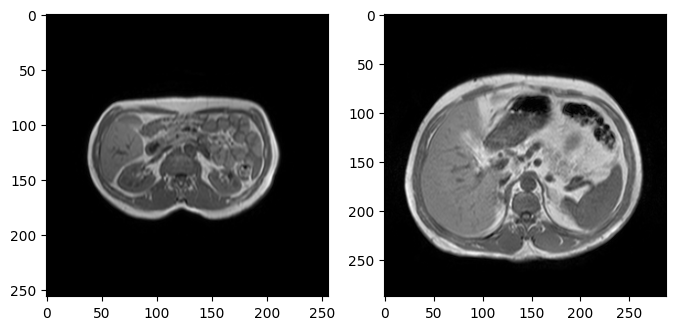

In [ ]:
# visualize middle images to see differences.
# They come from the same dataset, but we are seeing that there are lots of differences
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(img_vol_raw_1 [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(img_vol_raw_2 [mid_slice_2, :, :], cmap = 'gray')

## Functions for rescaling and reshaping

In [ ]:
def rescale_to_target_resolution(img_vol_raw, vox_dim, target_resolution=[1, 1, 1]):
    """
    Rescales the image volume to have isotropic voxels of the target resolution.
    """
    # Calculate the scaling factors for each dimension
    scale_vector = (
        vox_dim[0] / target_resolution[0],
        vox_dim[1] / target_resolution[1],
        vox_dim[2] / target_resolution[2]
    )

    # Rescale the image using the calculated scale vector
    isotr_img = skimage.transform.rescale(img_vol_raw, scale_vector, order=3, preserve_range=True, mode='constant')

    return isotr_img

def rescale_to_target_shape(isotr_img, target_shape=[192, 192, 192]):
    """
    Rescales the image volume to match the target shape.
    """
    # Get the factors for each dimension to rescale the image
    factors = (
        target_shape[0] / isotr_img.shape[0],
        target_shape[1] / isotr_img.shape[1],
        target_shape[2] / isotr_img.shape[2]
    )

    # match the target shape
    reshaped_img = zoom(isotr_img, factors, order=3, mode='nearest')

    return reshaped_img


In [ ]:
# Set target resolution and shape
target_resolution = [1, 1, 1]  # Target resolution (isotropic)
target_shape = [192, 192, 192]  # Target shape (number of pixels)

# Step 1: Rescale to target resolution (isotropic voxels)
isotr_img_1 = rescale_to_target_resolution(img_vol_raw_1, vox_dim_1, target_resolution)
isotr_img_2 = rescale_to_target_resolution(img_vol_raw_2, vox_dim_2, target_resolution)

# Step 2: Rescale to target shape
isotr_reshaped_img_1 = rescale_to_target_shape(isotr_img_1, target_shape)
isotr_reshaped_img_2 = rescale_to_target_shape(isotr_img_2, target_shape)



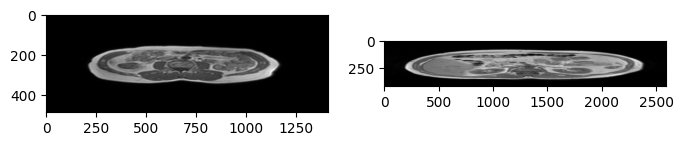

In [ ]:
# here we can see the scale differences

fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(isotr_img_1 [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(isotr_img_2 [mid_slice_2, :, :], cmap = 'gray')

In [ ]:
# since we have changes voxel dimensions, we have changed the number of slices
isotr_img_shape_1 = isotr_img_1.shape
isotr_img_shape_2 = isotr_img_2.shape

print ('Rescaled image 1 shape: ', isotr_img_shape_1)
print ('Rescaled image 2 shape: ', isotr_img_shape_2)

Rescaled image 1 shape:  (66, 485, 1408)
Rescaled image 2 shape:  (37, 415, 2592)


In [ ]:
# now the middle slice is the same for both volumes
reshaped_img_shape_1 = isotr_reshaped_img_1.shape
reshaped_img_shape_2 = isotr_reshaped_img_2.shape
mid_slice_1 = int(np.round(reshaped_img_shape_1[0]/2))
mid_slice_2 = int(np.round(reshaped_img_shape_2[0]/2))
print ('Middle slice image 1: ', mid_slice_1)
print ('Middle slice image 2: ', mid_slice_2)

Middle slice image 1:  96
Middle slice image 2:  96


In [ ]:
# check now that all shapes are the same
print ('Reshaped image 1 shape: ', reshaped_img_shape_1)
print ('Reshaped image 2 shape: ', reshaped_img_shape_2)

Reshaped image 1 shape:  (192, 192, 192)
Reshaped image 2 shape:  (192, 192, 192)


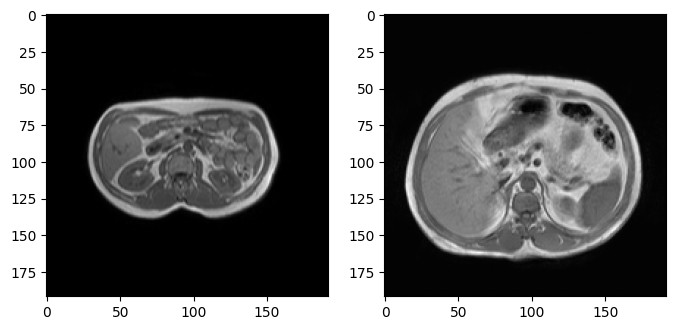

In [ ]:
# now i have slices with the same dimensions, and each pixel represents the same thing in the physical space
# we still have differences in the objects, but the value of each pixel represents
# the mean value of the same physical quantity
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(isotr_reshaped_img_1 [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(isotr_reshaped_img_2 [mid_slice_2, :, :], cmap = 'gray')

## Histogram visualization

Text(0.5, 1.0, 'Image Histogram')

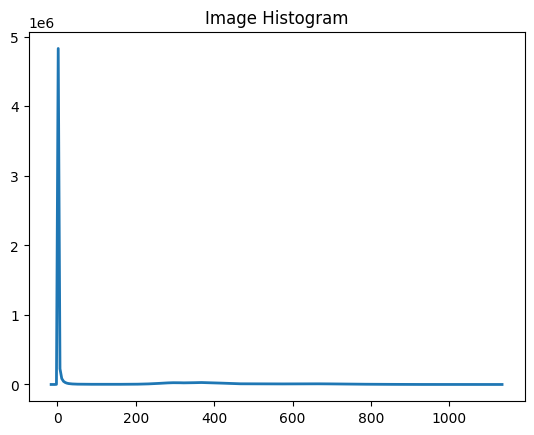

In [ ]:
hist, bins_center = exposure.histogram(isotr_reshaped_img_1)
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

Text(0.5, 1.0, 'Image Histogram')

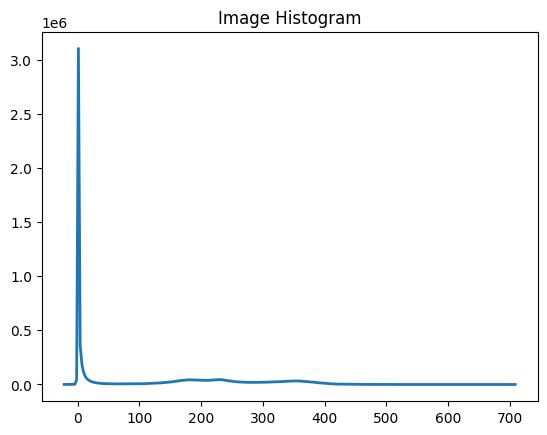

In [ ]:
hist, bins_center = exposure.histogram(isotr_reshaped_img_2)
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

## Image normalization and standardization

In [ ]:
# zero_mean
img_o = np.float32(isotr_reshaped_img_1.copy())
m = np.mean(img_o)
s = np.std(img_o)
normalized_img = np.divide((img_o - m), s)


In [ ]:
# percentiles to exclude outliers
perc1 = np.percentile(isotr_reshaped_img_1,1)
perc99 = np.percentile(isotr_reshaped_img_1,99)
normalized_img = np.divide((isotr_reshaped_img_1 - perc1), (perc99 - perc1))
normalized_img[normalized_img < 0] = 0.0
normalized_img[normalized_img > 1] = 1.0

In [ ]:
# min_max -> already implemented in opencv
norm_image = cv2.normalize(isotr_reshaped_img_1, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8UC1)

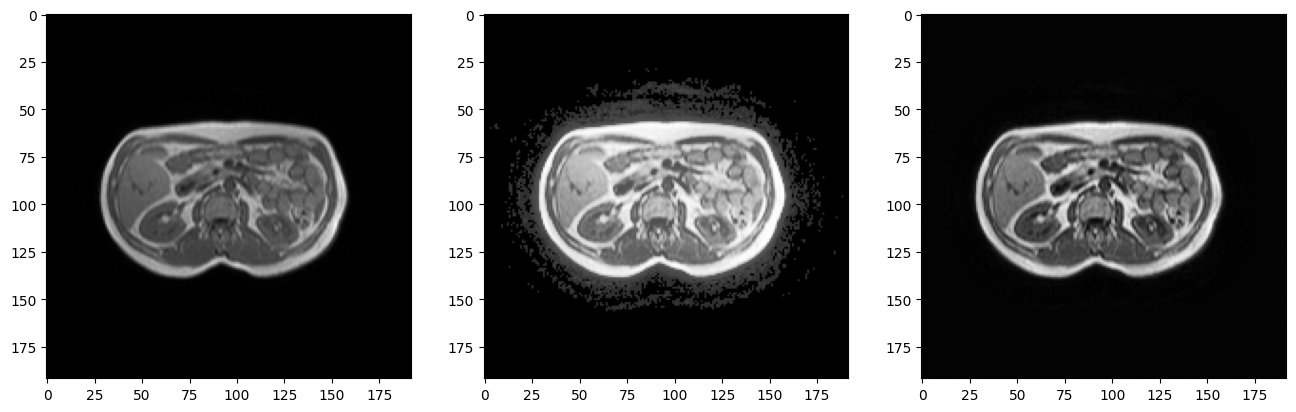

In [ ]:
eq_img_1 = cv2.equalizeHist(norm_image [mid_slice_1, :, :]) # classic hequalization
# in open cv there are two functinons: the first one creates the filter, the second applies it
clahe_img = cv2.createCLAHE (clipLimit = 2.0, tileGridSize = (8, 8)) # adaptive equalization
clahe_img_1 = clahe_img.apply (norm_image[mid_slice_1, :, :])
# according to our images and the normalization type, we can see better or worse certain anatomical structures (see example 2, Classic hequalization -> introduced artifacts)
fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(norm_image [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(eq_img_1, cmap = 'gray')
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(clahe_img_1, cmap = 'gray')

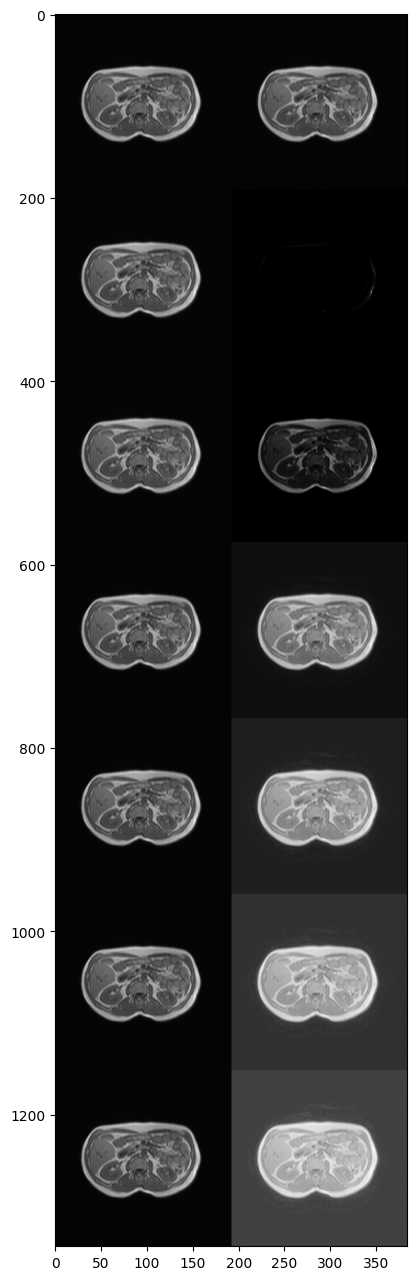

In [ ]:
corr_imgs = np.hstack([norm_image [mid_slice_1, :, :], norm_image [mid_slice_1, :, :]])

for gamma in np.arange(0.0, 3.5, 0.5):
  # ignore when gamma is 1 (there will be no change to the image)
  if gamma == 1:
    continue

  gamma = gamma if gamma > 0 else 0.1
  invGamma = 1.0 / gamma

  table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
  #print (table)
  # apply gamma correction using the lookup table
  adjusted = cv2.LUT(norm_image [mid_slice_1, :, :], table)
  corr_imgs_1 = np.hstack([norm_image [mid_slice_1, :, :], adjusted])
  corr_imgs = np.vstack ([corr_imgs, corr_imgs_1])

fig = plt.figure(figsize=(16,16))
plt.imshow(corr_imgs, cmap = 'gray')